### Lab 1 - Build a RNN model for IMDB movie review dataset for sentiment analysis

Here is the steps that program follows:
1. Load the IMDB dataset: Load the IMDB dataset using imdb.load_data(). We limit the dataset to the top 10,000 words to keep it manageable.
2. Preprocess the data: Pad sequences to ensure uniform length.
3. Build the RNN model: Create a sequential model with an embedding layer, a simple RNN layer, and a dense output layer with sigmoid activation.
4. Compile the model: Compile the model using binary crossentropy as the loss function since it's a binary classification problem.
5. Train the model: Train the model on the training data.
6. Evaluate the model: Evaluate the model on the test data.
7. Plot training and validation accuracy: Visualize the training and validation accuracy over epochs.

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense


In [5]:

# Load the IMDB dataset
num_words = 10000  # Only consider the top 10,000 words in the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 24s 1us/step


In [8]:
len(X_train[3])

550

In [10]:
# Preprocess the data
max_len = 500  # Max length of each review
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [12]:
# Build the RNN model
model = Sequential()
model.add(Embedding(num_words, 32))            # Embedding layer
model.add(SimpleRNN(32))                       # Simple RNN layer with 32 units
model.add(Dense(1, activation='sigmoid'))      # Output layer with sigmoid activation

# See the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 161ms/step - accuracy: 0.5491 - loss: 0.6837 - val_accuracy: 0.5070 - val_loss: 0.8529
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 159ms/step - accuracy: 0.6954 - loss: 0.5968 - val_accuracy: 0.8184 - val_loss: 0.4202
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step - accuracy: 0.8665 - loss: 0.3306 - val_accuracy: 0.8264 - val_loss: 0.4042
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 157ms/step - accuracy: 0.9368 - loss: 0.1845 - val_accuracy: 0.8294 - val_loss: 0.4133
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 156ms/step - accuracy: 0.9762 - loss: 0.0881 - val_accuracy: 0.8146 - val_loss: 0.4649


In [18]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.8155 - loss: 0.4777
Test Accuracy: 0.8157200217247009


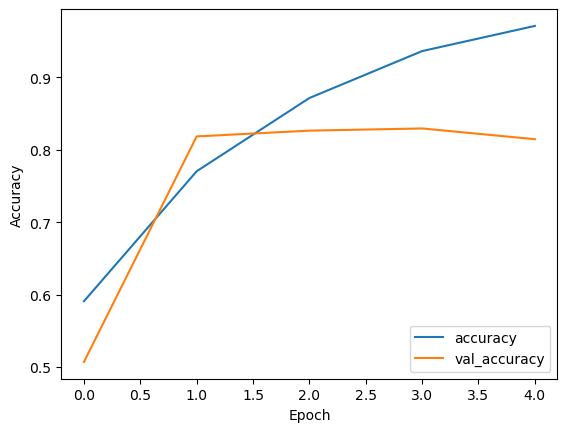

In [22]:

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
